In [37]:

import pandas as pd
import numpy as np
import math
import time
from tqdm import tqdm
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.metrics import mean_absolute_error

np.random.seed(123)

In [39]:
dat_file="main_ds_nlp_weather.csv"
stock_file1="ENS.csv"
stock_file2="ALB.csv"
stock_file3="SQM.csv"

#mydateparser = lambda x: pd.datetime.strptime(x,"%d/%m/%Y")
#mydateparser1 = lambda x: pd.datetime.strptime(x,"%m/%d/%Y")
#mydateparser2 = lambda x: pd.datetime.strptime(x,"%m/%d/%Y")

data1 = pd.read_csv(stock_file1, usecols =['Date', 'Close'])
data1.rename({'Close': 'ENS'}, axis=1, inplace=True)
data1['Date'] = pd.to_datetime(data1['Date'], format='%m/%d/%Y')
print(data1)

data2 = pd.read_csv(stock_file2, usecols =['Date', 'Close'])
data2.rename({'Close': 'ALB'}, axis=1, inplace=True)
data2['Date'] = pd.to_datetime(data2['Date'], format='%m/%d/%Y')
print(data2)

data3 = pd.read_csv(stock_file3, usecols =['Date', 'Close'])
data3.rename({'Close': 'SQM'}, axis=1, inplace=True)
data3['Date'] = pd.to_datetime(data2['Date'], format='%m/%d/%Y')
print(data3)

data4 = pd.read_csv(dat_file, usecols =["Date","ENS_sentiment_nltk","SQM_sentiment_nltk","ALB_sentiment_nltk","lithium_sentiment_nltk"])
data4['Date'] = pd.to_datetime(data3['Date'], format='%d/%m/%Y')
print(data4)




           Date        ENS
0    2015-01-02  60.770000
1    2015-01-05  60.000000
2    2015-01-06  58.500000
3    2015-01-07  59.029999
4    2015-01-08  60.410000
...         ...        ...
1253 2019-12-24  75.379997
1254 2019-12-26  75.750000
1255 2019-12-27  75.510002
1256 2019-12-30  75.580002
1257 2019-12-31  74.830002

[1258 rows x 2 columns]
           Date        ALB
0    2015-01-02  60.310001
1    2015-01-05  58.310001
2    2015-01-06  57.169998
3    2015-01-07  56.939999
4    2015-01-08  58.730000
...         ...        ...
1253 2019-12-24  72.320000
1254 2019-12-26  72.489998
1255 2019-12-27  72.010002
1256 2019-12-30  71.930000
1257 2019-12-31  73.040001

[1258 rows x 2 columns]
           Date        SQM
0    2015-01-02  23.768257
1    2015-01-05  23.242455
2    2015-01-06  22.911392
3    2015-01-07  22.901655
4    2015-01-08  22.833496
...         ...        ...
1253 2019-12-24  27.719999
1254 2019-12-26  28.139999
1255 2019-12-27  26.850000
1256 2019-12-30  26.340000
1257 

In [48]:
data5 = pd.merge(data1, data2, on=["Date"])
print("\n[data1 + data2]\n")
print(data5.describe())
#print(data5)

data6 = pd.merge(data5,data3, on=["Date"])
print("\n[data1 + data2 + data3]\n")
print(data6.describe())
#print(data6)

data = pd.merge(data6,data4 on=["Date"])
print("\n[data1 + data2 + data3 + data4]\n")
print(data.describe())
#print(data)
exog = data[["Date","ENS","SQM", "ALB","ENS_sentiment_nltk","SQM_sentiment_nltk","ALB_sentiment_nltk","lithium_sentiment_nltk"]]
#exog = data[["Date","ENS_Close","SQM_Close","ALB_Close"]]
#exog = data[["Date","ENS_Close"]]
exog_nots = data[["ENS","SQM", "ALB","ENS_sentiment_nltk","SQM_sentiment_nltk","ALB_sentiment_nltk","lithium_sentiment_nltk"]]
#data.head()
exog.head()


a = (np.ones(exog_nots.values.shape[1])/exog_nots.values.shape[1]).reshape(-1,1)
y = exog_nots.values @ a
y = pd.DataFrame(y, columns=['y'])
print(y)

plotFeatures=True


[data1 + data2]

               ENS          ALB
count  1258.000000  1258.000000
mean     68.675596    82.872226
std       8.951011    24.206893
min      43.389999    41.779999
25%      63.152501    62.740000
50%      68.510002    81.865002
75%      75.742500    98.070000
max      88.820000   144.580002

[data1 + data2 + data3]

               ENS          ALB          SQM
count  1258.000000  1258.000000  1258.000000
mean     68.675596    82.872226    33.018873
std       8.951011    24.206893    13.149778
min      43.389999    41.779999    12.677702
25%      63.152501    62.740000    22.771502
50%      68.510002    81.865002    30.255000
75%      75.742500    98.070000    42.942500
max      88.820000   144.580002    63.900002

[data1 + data2 + data3 + data4]

               ENS          ALB          SQM  ALB_sentiment_nltk  \
count  1258.000000  1258.000000  1258.000000         1258.000000   
mean     68.675596    82.872226    33.018873            0.041751   
std       8.951011    24.

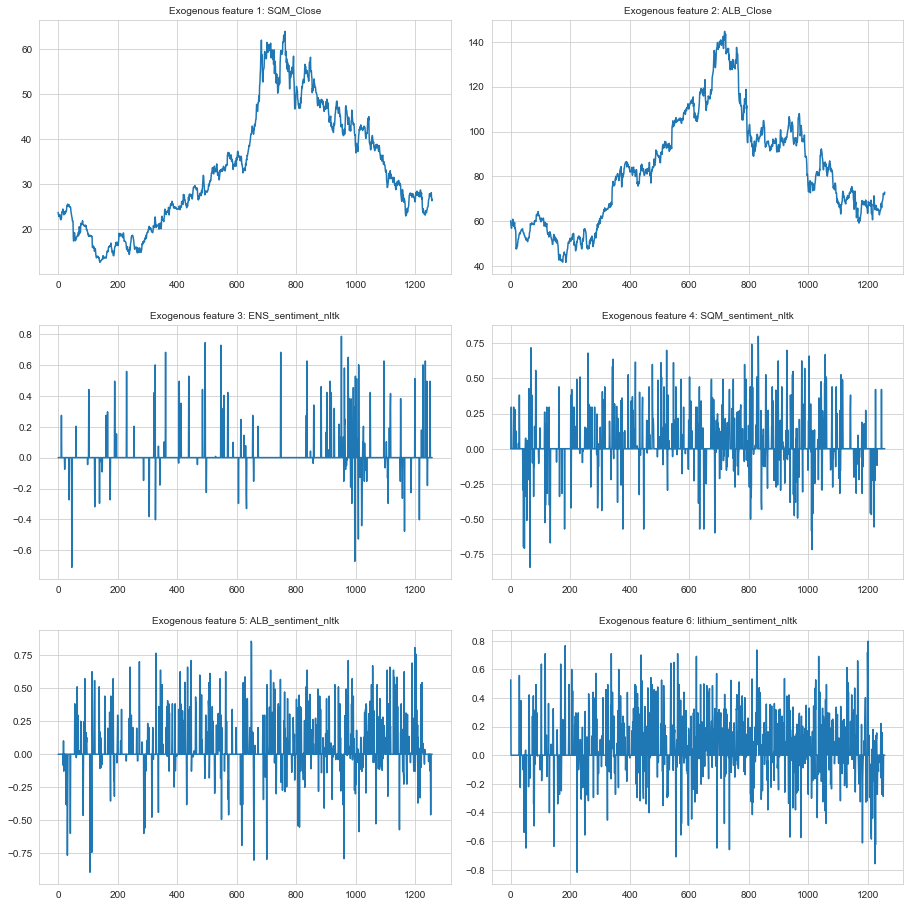

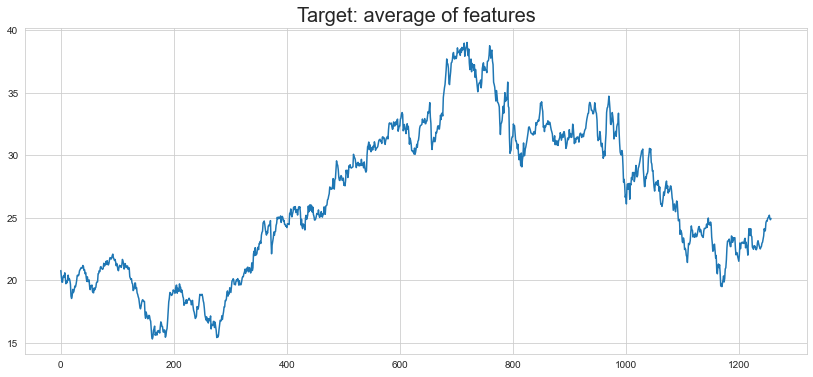

In [62]:
if(plotFeatures):
    t = np.arange(0, 1258)
    fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(6, 6))
    fig.subplots_adjust(top=2, bottom=0, right=2, left=0, wspace=0.1)

    #"ENS_Close","SQM_Close","ENS_sentiment_nltk","SQM_sentiment_nltk"
    ax1.plot(t, exog['SQM'])
    ax1.set_title("Exogenous feature 1: SQM_Close", fontsize=10)

    ax2.plot(t, exog['ALB'])
    ax2.set_title("Exogenous feature 2: ALB_Close", fontsize=10)

    ax3.plot(t, exog['ENS_sentiment_nltk'])
    ax3.set_title('Exogenous feature 3: ENS_sentiment_nltk', fontsize=10)

    ax4.plot(t, exog['SQM_sentiment_nltk'])
    ax4.set_title('Exogenous feature 4: SQM_sentiment_nltk', fontsize=10)

    ax5.plot(t, exog['ALB_sentiment_nltk'])
    ax5.set_title('Exogenous feature 5: ALB_sentiment_nltk', fontsize=10)

    ax6.plot(t, exog['lithium_sentiment_nltk'])
    ax6.set_title('Exogenous feature 6: lithium_sentiment_nltk', fontsize=10)

    plt.show()

    plt.figure(figsize=(14, 6))
    plt.plot(t, y['y'])
    plt.title('Target: average of features', fontsize=20)
    plt.show()

In [63]:

# add two columns in dataframe having values as Date and Adj Close
df = exog[["Date","ENS"]]
df = df.rename(columns = {"Date":"ds","ENS":"y"})
exog = exog.rename(columns = {"Date":"ds"})
df.head()
#sdf.head()

,ds,y
0,2015-01-02,60.770000
1,2015-01-05,60.000000
2,2015-01-06,58.500000
3,2015-01-07,59.029999
4,2015-01-08,60.410000


In [64]:

# split data frame  into two parts train and test
#splitRatio
split = 1006
exog_train = exog[:1006]
exog_test = exog[1006:]
print(exog_train)
print(exog_test)
df_train = df[:1006]
df_test = df[1006:]
print(df_train)
print(df_test)
#"ENS_Close","SQM_Close","ENS_sentiment_nltk","SQM_sentiment_nltk" pd.merge(data1, data2, on=["Date"])
data_train_regressors = pd.merge(df_train, exog_train, on = ["ds"])
data_test_regressors = pd.merge(df_test, exog_test, on = ["ds"])

             ds        ENS        SQM        ALB  ENS_sentiment_nltk  \
0    2015-01-02  60.770000  23.768257  60.310001              0.0000   
1    2015-01-05  60.000000  23.242455  58.310001              0.0000   
2    2015-01-06  58.500000  22.911392  57.169998              0.0000   
3    2015-01-07  59.029999  22.901655  56.939999              0.0000   
4    2015-01-08  60.410000  22.833496  58.730000              0.0000   
...         ...        ...        ...        ...                 ...   
1001 2018-12-24  72.000000  36.939999  73.129997              0.4939   
1002 2018-12-26  76.720001  39.040001  76.279999              0.0000   
1003 2018-12-27  76.110001  38.919998  77.220001              0.5106   
1004 2018-12-28  76.029999  38.160000  76.739998              0.0000   
1005 2018-12-31  77.610001  38.299999  77.070000              0.0000   

      SQM_sentiment_nltk  ALB_sentiment_nltk  lithium_sentiment_nltk  
0                0.00000            0.000000                0.52

In [78]:
#del df_test["y"]

#exogenous_features
# Instantiate prophet
from prophet import Prophet
model = Prophet()#n_changepoints=1)
#changepoint_prior_scale=0.05
model.add_regressor('SQM', mode="multiplicative")
model.add_regressor('ALB', mode="multiplicative")
model.add_regressor('ENS_sentiment_nltk', mode="multiplicative")
model.add_regressor('ALB_sentiment_nltk', mode="multiplicative")
model.add_regressor('SQM_sentiment_nltk', mode="multiplicative")
model.add_regressor('lithium_sentiment_nltk', mode="multiplicative")
model.add_seasonality(name='yearly', period=365, fourier_order=1, prior_scale=0.1, mode='additive') 
model.add_seasonality(name='monthly', period=30, fourier_order=1, prior_scale=0.1, mode='additive')

# fit the training data
model.fit(data_train_regressors)

03:50:28 - cmdstanpy - INFO - Chain [1] start processing
03:50:28 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
forecast = model.predict(data_test_regressors)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,ALB,ALB_lower,ALB_upper,ALB_sentiment_nltk,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
247,2019-12-24,64.190282,74.858459,109.678490,45.073614,84.266144,-0.161177,-0.161177,-0.161177,-0.000373,...,-0.157658,-0.157658,-0.157658,39.177705,39.177705,39.177705,-1.982907,-1.982907,-1.982907,91.469422
248,2019-12-26,64.306651,74.716146,109.176962,45.016261,84.525982,-0.159093,-0.159093,-0.159093,-0.000373,...,-0.155860,-0.155860,-0.155860,39.176015,39.176015,39.176015,-1.957430,-1.957430,-1.957430,91.680086
249,2019-12-27,64.364836,74.941372,109.387064,45.007056,84.654246,-0.164976,-0.164976,-0.164976,-0.000373,...,-0.160866,-0.160866,-0.160866,39.180365,39.180365,39.180365,-1.943820,-1.943820,-1.943820,91.399563
250,2019-12-30,64.539389,75.068423,109.773171,44.980728,85.034377,-0.165957,-0.165957,-0.165957,-0.000373,...,-0.161500,-0.161500,-0.161500,39.243408,39.243408,39.243408,-1.899549,-1.899549,-1.899549,91.502106
251,2019-12-31,64.597574,75.218562,110.195416,44.971952,85.173809,-0.152353,-0.152353,-0.152353,-0.000373,...,-0.148133,-0.148133,-0.148133,39.177705,39.177705,39.177705,-1.883661,-1.883661,-1.883661,92.321723


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2019-01-02  43.476611   72.997075   81.004518    43.476611    43.476611   
1   2019-01-03  43.534795   69.917863   77.981707    43.534795    43.534795   
2   2019-01-04  43.592980   72.083800   80.325805    43.592980    43.592980   
3   2019-01-07  43.767533   72.813051   81.228027    43.767533    43.767533   
4   2019-01-08  43.825718   71.331649   79.896577    43.825718    43.825718   
..         ...        ...         ...         ...          ...          ...   
247 2019-12-24  64.190282   74.858459  109.678490    45.073614    84.266144   
248 2019-12-26  64.306651   74.716146  109.176962    45.016261    84.525982   
249 2019-12-27  64.364836   74.941372  109.387064    45.007056    84.654246   
250 2019-12-30  64.539389   75.068423  109.773171    44.980728    85.034377   
251 2019-12-31  64.597574   75.218562  110.195416    44.971952    85.173809   

          ALB  ALB_lower  ALB_upper  ALB_sentiment_

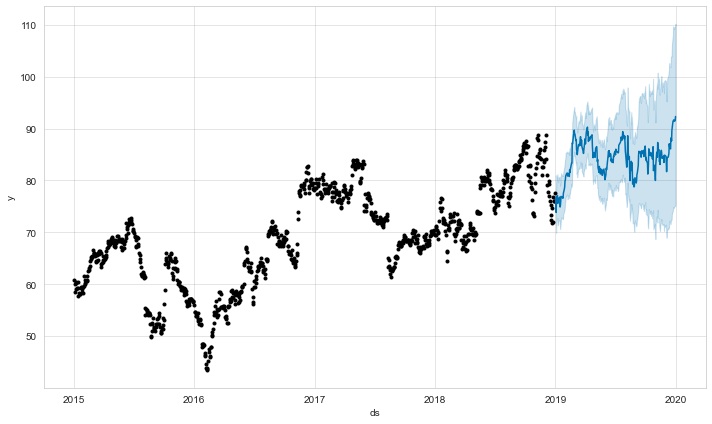

In [80]:

model.plot(forecast)
print(forecast)

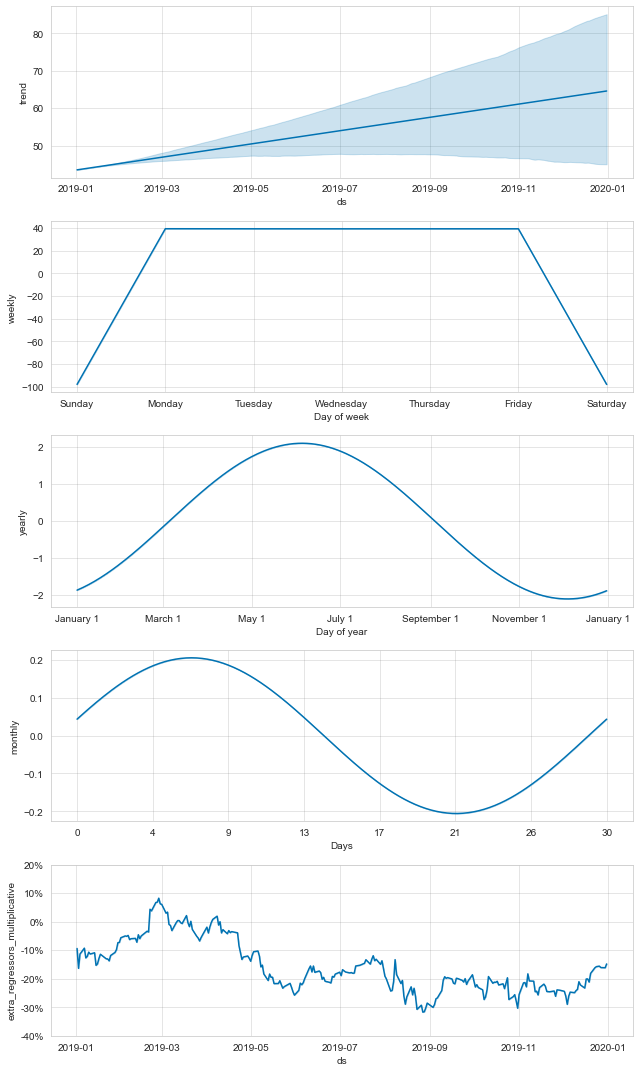

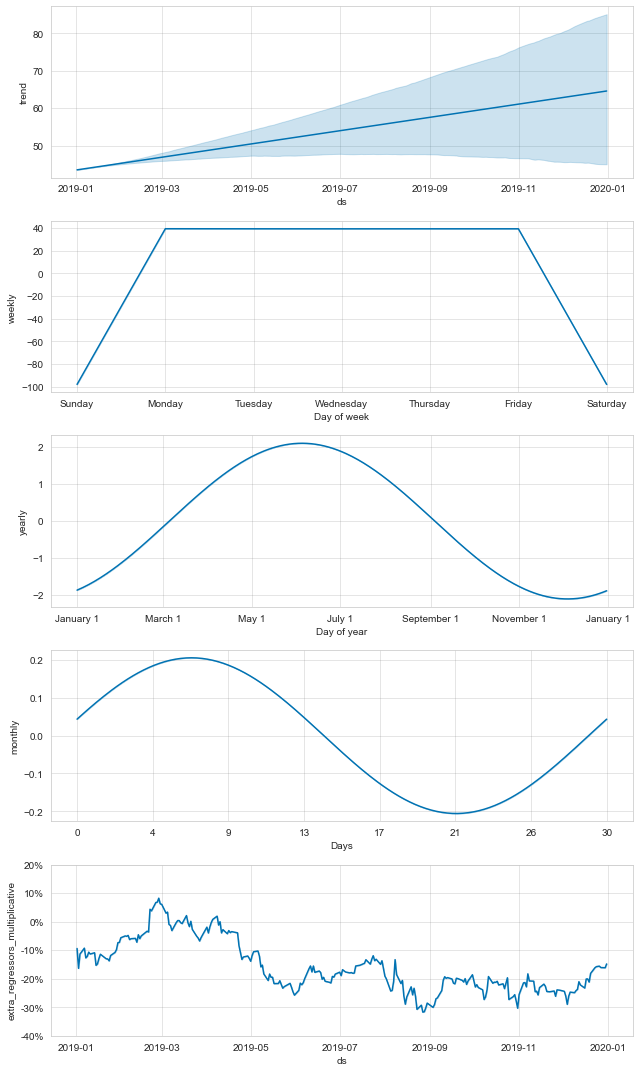

In [81]:
if(plotFeatures):
    model.plot_components(forecast)

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat'],squared=False))
mape = mean_absolute_percentage_error(y_true = df_test["y"], y_pred = forecast['yhat'])
print("Root Mean Squared Error (RMSE):",rmse)
print("Mean Absolute Percentage Error (MAPE):",mape)
#print("Mean Absolute Percentage Error (MAPE):",np.mean(np.abs((df_test["y"]-forecast['yhat'])/df_test["y"]))*100)

Root Mean Squared Error (RMSE): 4.248312160102327
Mean Absolute Percentage Error (MAPE): 0.26056780217477526
